In [9]:
import os.path
from IPython.display import FileLink, FileLinks
from datetime import datetime
import time
FileLinks('.')

input_path_movies = os.path.join('Movies', 'movies.dat')
input_path_ratings = os.path.join('Movies', 'ratings.dat.gz')


raw_data = sc.textFile(input_path_movies)
raw_ratings = sc.textFile(input_path_ratings)

header1 = raw_data.take(2)
header2 = raw_ratings.take(2)

#MovieID, Movie (Year), [Genre]
data = raw_data.collect()
#PersonID, MovieID, Rating, Timestamp
ratings = raw_ratings.collect()

In [10]:
def avg_rating_movie(movie_index):
    movie_id = movie_index
    i = 0
    sum = 0
    for movie in ratings:
        vals = movie.split('::')
        if vals[1] == movie_id:
            i += 1
            sum += float(vals[2])
    return round(float(sum/i),2)

In [11]:
def get_actual_movie_name(movie_id):
    movie_name = get_movie_name(movie_id)
    comma = ','
    if comma in movie_name:
        movie_name = movie_name.split(',')
        date = movie_name[1][-6:]
        movie = movie_name[1][:-6] + movie_name[0] + " " + date
    else:
        movie = " " + movie_name
    return movie

In [12]:
def get_movie_index(movie_name):
    for movie in data:
        vals = movie.split('::')
        if vals[1].startswith(movie_name):
            return vals[0]
            break       

In [13]:
def get_movie_name(movie_index):
    for movie in data:
        vals = movie.split('::')
        if vals[0] == movie_index:
            return vals[1]  

In [14]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import collections

def convert_timestamps(movie_id):
    year_list = list()
    for timestamp in ratings:
        vals = timestamp.split('::')
        if vals[1] == movie_id:
            if not datetime.datetime.fromtimestamp(
            int(vals[3])).strftime('%Y') in year_list:
                year_list.append(datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y'))
    year_list.sort()
    return year_list


def avg_rating_per_year(movie_name, year_list):
    movie_index = get_movie_index(movie_name)
    
    res = {}
    i = 0
    sum = 0
 
    for year in year_list:
        for movie in ratings:
            vals = movie.split('::')
            if vals[1] == movie_index:
                if datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y') == year: 
                    i += 1
                    sum +=  float(vals[2])
                    res[year] = float(round((sum/i), 2))
        i = 0
        sum = 0

    od = collections.OrderedDict(sorted(res.items()))
    plt.bar(range(len(od)), od.values(), align="center", color = "g", width = 0.3)
    plt.xticks(range(len(od)), list(od.keys()))
    plt.yticks(range(6))
    plt.xlabel('Year', fontsize=11, fontweight='bold')
    plt.ylabel('Rating', fontsize=11, fontweight='bold')
    plt.suptitle('Average rating per year for' + str(get_actual_movie_name(movie_index)), fontsize=14, fontweight='bold')
    plt.show()
  

movie_title = var_film

In [15]:
from IPython.display import HTML        
        
input_form = """
<div style="background-color:white; border: 1px solid black; width:300px; padding:20px;">
Film: <input type="text" id="film"><br>
<button onclick="set_value()" style="margin-top:20px" align="center">Geef gemiddelde rating</button>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var var_film = document.getElementById('film').value;
        var kernel = IPython.notebook.kernel;
        kernel.execute("var_film = '" + var_film + "'");
        IPython.notebook.execute_all_cells();
    }
</script>
"""

HTML(input_form + javascript)

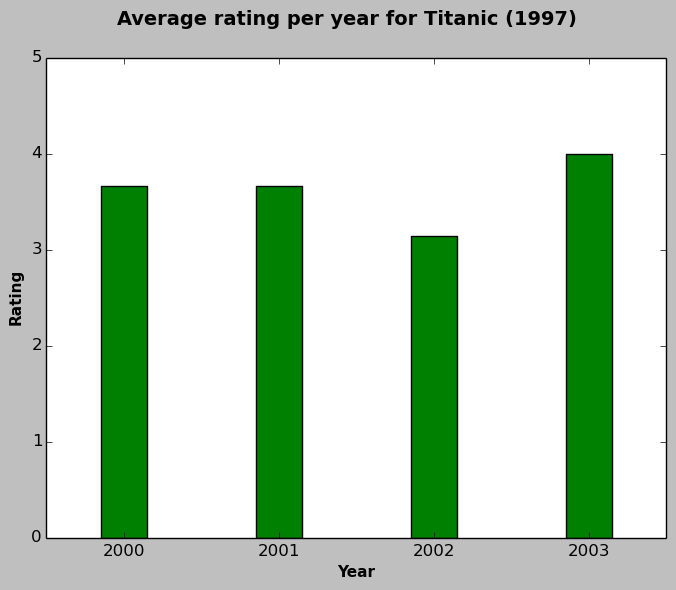

In [16]:
avg_rating_per_year(movie_title, convert_timestamps(get_movie_index(movie_title)))